In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

In [6]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(10))
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

## Model without regularization

In [7]:
model = Sequential()
    
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))    
model.add(Conv2D(32, (3, 3), activation='relu'))    
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 3,702,186
Trainable params: 3,702,186
Non-trainable para

In [8]:
model_details = model.fit(x_train, y_train,
                    batch_size = 512, 
                    epochs = 10, 
                    validation_data= (x_test, y_test),
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 318s 6ms/step - loss: 14.4860 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 329s 7ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 344s 7ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 320s 6ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 304s 6ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 306s 6ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 312s

In [10]:
score = model.evaluate(x_test, y_test)
print("Accuracy: {0:.2f}%".format(score[1]*100))

10000/10000 [==============================] - 21s 2ms/step
Accuracy: 10.00%


## Model with regularization

In [19]:
model = Sequential()
    
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))    
model.add(Conv2D(32, (3, 3), activation='relu'))    
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               3686912   
__________

In [20]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics = ['accuracy'])

In [21]:
model_details = model.fit(x_train, y_train,
                    batch_size = 512, 
                    epochs = 10, 
                    validation_data= (x_test, y_test),
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 269s 5ms/step - loss: 1.7374 - acc: 0.4371 - val_loss: 1.2946 - val_acc: 0.5317
Epoch 2/10
50000/50000 [==============================] - 269s 5ms/step - loss: 1.1687 - acc: 0.5894 - val_loss: 1.3679 - val_acc: 0.5355
Epoch 3/10
50000/50000 [==============================] - 288s 6ms/step - loss: 0.9497 - acc: 0.6647 - val_loss: 0.9872 - val_acc: 0.6578
Epoch 4/10
50000/50000 [==============================] - 277s 6ms/step - loss: 0.7787 - acc: 0.7252 - val_loss: 0.9384 - val_acc: 0.6768
Epoch 5/10
50000/50000 [==============================] - 274s 5ms/step - loss: 0.6483 - acc: 0.7742 - val_loss: 0.9666 - val_acc: 0.6821
Epoch 6/10
50000/50000 [==============================] - 280s 6ms/step - loss: 0.5347 - acc: 0.8143 - val_loss: 0.9346 - val_acc: 0.6835
Epoch 7/10
50000/50000 [==============================] - 277s 6ms/step - loss: 0.4479 - acc: 0.8431 - val_loss: 0.9374 - 

In [22]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 21s 2ms/step


In [23]:
print("Accuracy: {0:.2f}%".format(score[1]*100))

Accuracy: 69.32%


In [24]:
y_pred = model.predict(x_test)

In [25]:
correct_indices = np.nonzero(np.argmax(y_pred,axis=1) == np.argmax(y_test,axis=1))[0]
incorrect_indices = np.nonzero(np.argmax(y_pred,axis=1) != np.argmax(y_test,axis=1))[0]

In [30]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

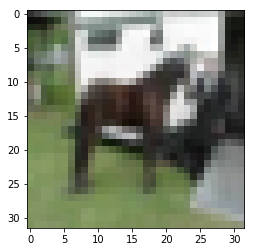

Prediction: deer


In [33]:
image = 3
plt.imshow(x_test[incorrect_indices[image]].reshape(32,32,3))
plt.show()
print("Prediction: {0}".format(labels[np.argmax(y_pred[incorrect_indices[image]])]))

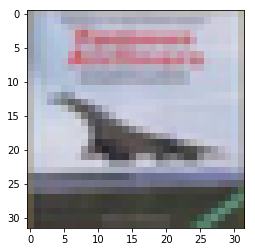

Prediction: airplane


In [35]:
image = 2
plt.imshow(x_test[correct_indices[image]].reshape(32,32,3))
plt.show()
print("Prediction: {0}".format(labels[np.argmax(y_pred[correct_indices[image]])]))